In [1]:
import pandas as pd
import cv2 as cv
import sys 

import sklearn
import numpy as np 
import os
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from IPython.utils import io

In [2]:
sync = pd.read_csv('data/hands/Training/Shahar Terner/Sachar636771046527112972Sync.csv')
spot = pd.read_csv('data/hands/Training/Shahar Terner/Sachar636771045591258071Spontan.csv')
alone = pd.read_csv('data/hands/Training/Shahar Terner/Sachar636771047408504303Alone.csv')
alone_cmp = pd.read_csv('data/hands/HandRight.csv')


In [3]:
alone_cmp.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


In [4]:
alone.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,561.4594,67274,left,1,-70.33230,169.6624,66.57047,116.82760,230.10440,-232.0020,...,2.612679,-96.73210,121.8236,26.51512,-298.2882,-19.49716,35.98683,0.094123,1.888679,0.329454
1,561.4760,67276,left,1,-69.29771,172.8164,61.57287,43.34046,166.12220,-284.0924,...,2.563127,-95.64294,121.9743,24.74826,-287.7798,-32.12753,29.46060,0.000000,2.156652,0.462041
2,561.4925,67278,left,1,-67.98444,175.2615,55.70394,75.70715,105.90160,-366.9593,...,2.534463,-93.57269,121.8934,21.80350,-279.9629,-39.04336,28.45215,0.000000,2.059718,0.455725
3,561.5090,67280,left,1,-66.06445,176.7525,49.44841,99.28395,94.03284,-357.6847,...,2.501072,-90.90820,121.0040,18.81344,-273.9011,-43.63946,28.41852,0.000000,2.105497,0.550161
4,561.5256,67282,left,1,-63.64779,177.6863,43.09280,147.84220,27.74666,-398.7127,...,2.433856,-88.85471,119.9976,16.35428,-270.0061,-46.35603,30.38200,0.000000,2.095404,0.608649


In [5]:
alone_cmp['Time'] = alone_cmp['Time'] + (alone.iloc[0,0] - alone_cmp.iloc[0,0])
alone_cmp.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,561.4594,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,561.4759,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,561.4929,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,561.5095,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,561.5262,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


In [6]:
sync = sync.set_index('Time')
spot = spot.set_index('Time')
alone = alone.set_index('Time')
alone_cmp = alone_cmp.set_index('Time')

In [7]:
sync.describe()

,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
count,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000,9046.000000
mean,61443.269954,1.999116,-8.303831,205.153307,29.692022,-0.258121,-0.687626,0.732390,1.302094,0.231522,-0.411449,5.073159,148.374353,36.942437,26.289437,-35.685580,66.189130,0.071603,0.460350,0.057312
std,2494.087862,0.029727,114.076689,39.633510,29.226010,112.007500,105.639924,84.791598,0.406509,1.356114,1.393457,137.431949,40.076469,22.010824,285.808342,58.315204,44.493832,0.220393,0.791437,0.188010
min,57122.000000,1.000000,-232.583500,95.871930,-86.975040,-522.291900,-936.715800,-604.876000,0.028502,-2.993421,-3.140609,-235.378900,41.043330,-38.334400,-400.466000,-186.772400,-59.390530,0.000000,0.000000,0.000000
25%,59284.500000,2.000000,-109.356550,179.866825,14.738917,-55.560432,-54.158552,-37.307492,1.098461,-1.101727,-1.292490,-122.879800,123.924300,24.876653,-253.124300,-78.672092,35.056368,0.000000,0.000000,0.000000
50%,61445.000000,2.000000,-12.148210,204.027550,32.707705,-2.167702,1.517804,-1.103987,1.355069,-0.290490,-0.743953,18.912010,147.196300,37.902940,193.307900,-31.166265,68.548995,0.000000,0.044963,0.000000
75%,63602.750000,2.000000,97.852667,228.541900,47.597293,55.678945,57.430475,37.717388,1.595150,1.570480,0.378623,139.920700,172.974625,48.259473,311.208225,4.347710,93.500363,0.000000,0.512012,0.000000
max,65759.000000,2.000000,231.685000,345.954600,108.593800,987.333000,695.924800,540.058200,2.321273,3.106793,3.141453,274.867000,282.715400,146.509600,422.735900,163.435600,210.481400,1.000000,3.141593,1.000000


In [8]:
sync.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9046 entries, 473.3199 to 548.3006
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0    Frame ID        9046 non-null   int64  
 1    Hand Type       9046 non-null   object 
 2    # hands         9046 non-null   int64  
 3    Position X      9046 non-null   float64
 4    Position Y      9046 non-null   float64
 5    Position Z      9046 non-null   float64
 6    Velocity X      9046 non-null   float64
 7    Velocity Y      9046 non-null   float64
 8    Velocity Z      9046 non-null   float64
 9    Pitch           9046 non-null   float64
 10   Roll            9046 non-null   float64
 11   Yaw             9046 non-null   float64
 12   Wrist Pos X     9046 non-null   float64
 13   Wrist Pos Y     9046 non-null   float64
 14   Wrist Pos Z     9046 non-null   float64
 15   Elbow pos X     9046 non-null   float64
 16   Elbow Pos Y     9046 non-null   float64
 17   

In [9]:
sync.head()

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Time,,,,,,,,,,,,,,,,,,,,,
473.3199,57122,right,2,122.5620,218.3500,-31.88206,19.886130,75.80657,65.97881,0.617926,...,-0.440404,154.1254,174.5538,12.09824,310.6552,8.973523,106.50380,0.0,0.145420,0.0
473.3199,57122,left,2,-127.4118,201.7256,-10.88737,-16.198040,108.11870,41.10345,0.484390,...,0.241881,-143.8172,160.5733,41.88228,-301.3908,-6.086051,132.57990,0.0,0.156763,0.0
473.3364,57124,right,2,122.6436,220.4657,-30.86330,-0.449261,121.86500,63.31036,0.672810,...,-0.435520,153.1742,174.1515,11.24345,305.8892,3.519703,102.86100,0.0,0.119546,0.0
473.3364,57124,left,2,-127.6337,203.2215,-9.95556,-19.241040,90.65759,51.81181,0.508929,...,0.224138,-142.9792,160.6243,42.04107,-296.4537,-9.288877,133.72500,0.0,0.181778,0.0
473.3530,57126,right,2,122.5734,222.8511,-29.92606,-7.838688,126.03910,51.80624,0.722643,...,-0.436253,152.2634,174.3460,10.30312,298.7614,-2.771122,99.73855,0.0,0.112040,0.0


In [10]:
left_s = sync[sync[' Hand Type'] == 'left']
right_s = sync[sync[' Hand Type'] == 'right']

left_sp = spot[spot[' Hand Type'] == 'left']
right_sp = spot[spot[' Hand Type'] == 'right']

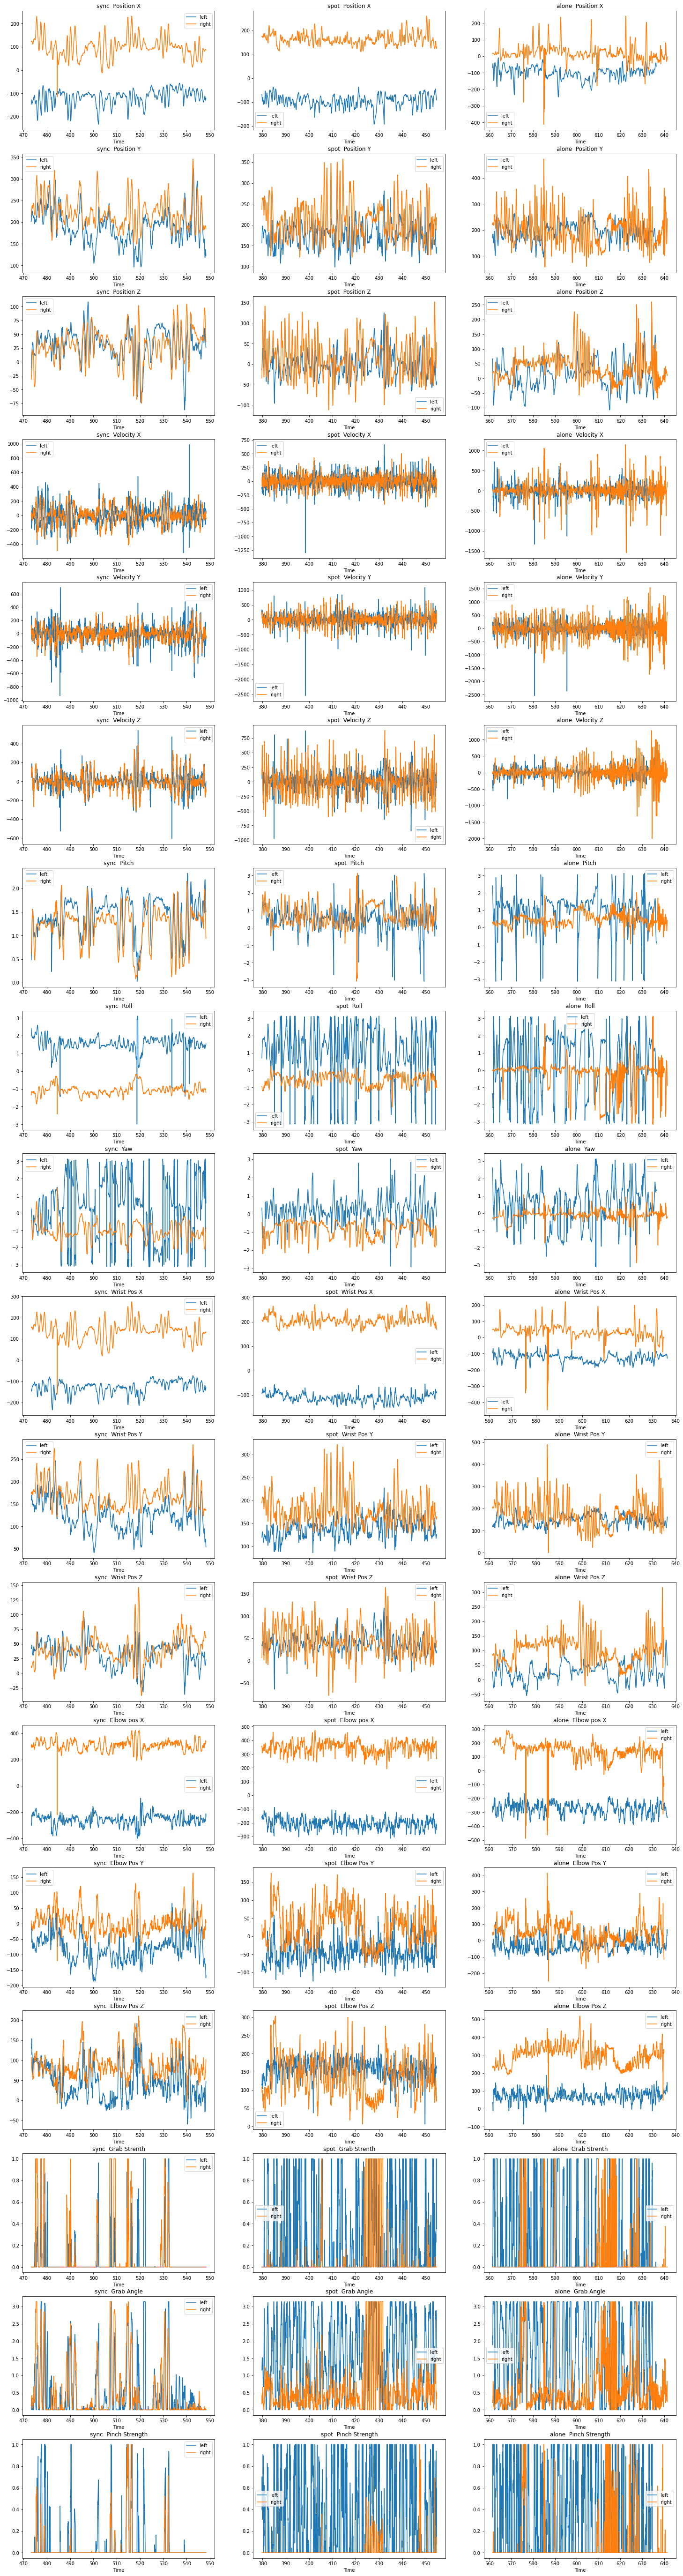

In [11]:
plt.figure()
i = 1
for x in range(1,54 ,3):
    plt.subplot(18,3,x)
    left_s.iloc[:,i+2].plot(figsize=(25,100),label='left')
    right_s.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("sync {}".format(left_s.columns[i+2]))
    plt.legend()

    plt.subplot(18,3,x + 1)
    left_sp.iloc[:,i+2].plot(figsize=(25,100),label='left')
    right_sp.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("spot {}".format(left_s.columns[i+2]))
    plt.legend()
    
    plt.subplot(18,3,x + 2)
    alone.iloc[:,i+2].plot(figsize=(25,100),label='left')
    alone_cmp.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("alone {}".format(left_s.columns[i+2]))
    plt.legend()

    i = i + 1
plt.show()



## Loading the data

In [12]:
right_hand = pd.read_csv('data/hands/HandRight.csv') 

right_hand[" Hand Type"] = "right"
right_hand = right_hand.dropna()

def join_right_hand(df):

    right_hand['Time'] = df['Time']
    right_hand[' Frame ID'] = df[[' Frame ID']]

    frames = [df,right_hand]
    df = pd.concat(frames)

    df = df.sort_values(' Hand Type').sort_values('Time',kind='stable')
    x = df[' Hand Type'].value_counts()
    df = df.reset_index().iloc[:x.iloc[1] * 2]
    
    df[" # hands"] = 2

    return df

In [13]:
def proccess_df(df):
    df = df.drop(df[df[" # hands"] == 1].index)
    
    left = df[df[' Hand Type'] == 'left'].reset_index()
    right = df[df[' Hand Type'] == 'right'].reset_index()

    # ret = pd.DataFrame({
    #     'diff_pos_x': [],
    #     'diff_pos_y': [],
    #     'diff_pos_z': [],
    #     'diff_vel_x': [],
    #     'diff_vel_y': [],
    #     'diff_vel_z': [],
    #     'diff_wr_pos_x': [],
    #     'diff_wr_pos_y': [],
    #     'diff_wr_pos_z': [],
    #     'diff_grab_str': []
    # })



    # ret['diff_pos_x'] = (left[' Position X'] - right[' Position X'])
    # ret['diff_pos_y'] = (left[' Position Y'] - right[' Position Y'])
    # ret['diff_pos_z'] = (left[' Position Z'] - right[' Position Z'])
    # ret['diff_vel_x'] = (left[' Velocity X'] - right[' Velocity X'])
    # ret['diff_vel_y'] = (left[' Velocity Y'] - right[' Velocity Y'])
    # ret['diff_vel_z'] = (left[' Velocity Z'] - right[' Velocity Z'])
    # ret['diff_wr_pos_x'] = (left[' Wrist Pos X'] - right[' Wrist Pos X'])
    # ret['diff_wr_pos_y'] = (left[' Wrist Pos Y'] - right[' Wrist Pos Y'])
    # ret['diff_wr_pos_z'] = (left[' Wrist Pos Z'] - right[' Wrist Pos Z'])
    # ret['diff_grab_str'] = (left[' Grab Strenth'] - right[' Grab Strenth'])

    
    # df = ret.groupby(np.arange(len(ret.index))//200, axis=0).max()
    

    df = pd.DataFrame({
        'pos_x_l' : left[' Position X'],
        'pos_y_l' : left[' Position Y'],
        'pos_z_l' : left[' Position Z'],
        'vel_x_l' : left[' Velocity X'],
        'vel_y_l' : left[' Velocity Y'],
        'vel_z_l' : left[' Velocity Z'],
        'wir_x_l' : left[' Wrist Pos X'],
        'wir_y_l' : left[' Wrist Pos Y'],
        'wir_z_l' : left[' Wrist Pos Z'],
        'df_gr_l' : left[' Grab Strenth'],
        'pos_x_r' : right[' Position X'],
        'pos_y_r' : right[' Position Y'],
        'pos_z_r' : right[' Position Z'],
        'vel_x_r' : right[' Velocity X'],
        'vel_y_r' : right[' Velocity Y'],
        'vel_z_r' : right[' Velocity Z'],
        'wir_x_r' : right[' Wrist Pos X'],
        'wir_y_r' : right[' Wrist Pos Y'],
        'wir_z_r' : right[' Wrist Pos Z'],
        'df_gr_r' : right[' Grab Strenth'],
    })

    df = df.groupby(np.arange(len(df.index))//200, axis=0).max()
    
    return df.dropna()

In [14]:
def load_data(path):
    li = []

    for subject in os.listdir(path):
        for file in os.listdir(path + '/' + subject):
            df = pd.read_csv(path + '/' + subject + '/' + file)
            if "Alone" in file:
                df = join_right_hand(df)
                df = proccess_df(df)
                df['OUTCOME'] = 0
            elif "Spon" in file:
                df = proccess_df(df)
                df['OUTCOME'] = 1
            else:
                df = proccess_df(df)
                df['OUTCOME'] = 2
            li.append(df)
    df = pd.concat(li,ignore_index=True)
    return df

In [15]:
df = load_data('data/hands/Training')
df_test = load_data('data/hands/Validation')

In [16]:
df["OUTCOME"].value_counts()

1    342
2    338
0    307
Name: OUTCOME, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('OUTCOME',axis=1)
Y = df['OUTCOME']
x_test = df_test.drop('OUTCOME',axis=1)
y_test = df_test['OUTCOME']


x_train,x_validate,y_train,y_validate = train_test_split(X,Y,test_size = 0.05,random_state=42)

In [ ]:
x_axis = ["knn","Linear \n Regression","Random \n Forest","Gaussian NB","adaboost","xgboost"]
y_axis = []

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn =  KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

knn.fit(x_train,y_train)
score = knn.score(x_validate,y_validate)
y_axis.append(score)
print("knn:{}".format(score))

0.74

In [23]:
from sklearn.linear_model import LinearRegression

lr =  LinearRegression()

lr.fit(x_train,y_train)
score = lr.score(x_validate,y_validate)
y_axis.append(score)
print("lr:{}".format(score))


0.6672786617437811

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
score = rfc.score(x_validate,y_validate)
y_axis.append(score)
print("random forest :{}".format(score))


0.88

In [26]:
from sklearn.naive_bayes import GaussianNB


gnb_clf =  GaussianNB()

gnb_clf.fit(x_train,y_train)
score = gnb_clf.score(x_validate,y_validate)
y_axis.append(score)
print("gaussian nayive bayas:{}".format(score))

0.78

In [21]:
from sklearn.ensemble import AdaBoostClassifier


ada = AdaBoostClassifier(n_estimators=90,learning_rate=1.1)
ada.fit(x_train,y_train)
ada.score(x_validate,y_validate)


0.8

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eta=0.35,max_depth=6, eval_metric='mlogloss')
xgb.fit(x_train,y_train)
xgb.score(x_validate,y_validate)


0.92

In [24]:
from sklearn.ensemble import VotingClassifier

vt = VotingClassifier(
    [('xgb',xgb),
    ('knn',knn),
    ('rfc',rfc)],voting='soft'
)

vt.fit(x_train,y_train)
vt.score(x_validate,y_validate)



0.9

In [27]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(vt,x_train,y_train,cv=5)

In [28]:
cv

array([0.92553191, 0.90425532, 0.93048128, 0.90909091, 0.93582888])

Text(83.40000000000006, 0.5, 'actual')

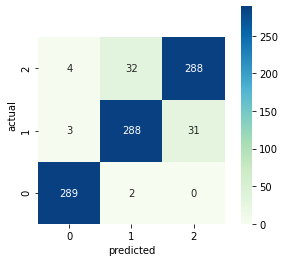

In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

pred = cross_val_predict(vt,x_train,y_train)
cm=confusion_matrix(y_train, pred)

axes=sns.heatmap(cm,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
axes.set_xlabel('predicted')
axes.set_ylim(0,3.5)
axes.set_ylabel('actual')

In [31]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[('vt',vt),
                ('xgb',xgb)],
                cv=5,
                final_estimator=knn
)
stacking_clf.fit(x_train, y_train)
stacking_clf.score(x_test,y_test)

0.9384057971014492

Text(83.40000000000006, 0.5, 'actual')

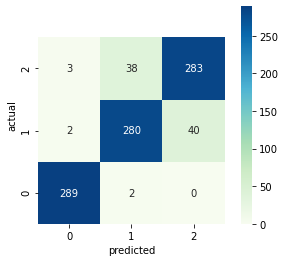

In [32]:
pred = cross_val_predict(stacking_clf,x_train,y_train)
cm=confusion_matrix(y_train, pred)

axes=sns.heatmap(cm,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
axes.set_xlabel('predicted')
axes.set_ylim(0,3.5)
axes.set_ylabel('actual')